In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

Load the handwritten dataset

In [287]:
digits_dataset = loadmat("Handwritten Digits.mat")

In [288]:
X, y = digits_dataset["X"],digits_dataset["y"]

## Shape the Output

In [289]:
y.shape

(5000, 1)

In [290]:
y = y.ravel()
y

array([10, 10, 10, ...,  9,  9,  9], dtype=uint8)

In [291]:
y[y==10]=0
y

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

## Visualize the plot

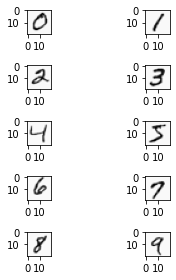

In [292]:
nrows = 5
ncols =2
fig,axes = plt.subplots(nrows=nrows,ncols=ncols)

image_index = 0
for i in range(nrows):
    for j in range(ncols):
        axes[i,j].imshow(X[image_index].reshape(20,20,order='F'),cmap='Greys')
        fig.tight_layout()
        if(image_index+500)==5000:
            break
        image_index +=500

## Neural Network Model 

In [293]:
y_org = np.zeros((y.shape[0],10))
for i in range(len(y)):
    y_org[i][y[i]] = 1
    
y_org

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [294]:
def Size_of_Layers(X,y,nh):
    nx = 400
    ny = 10
    nh = nh
    
    return (nx,ny,nh)

In [295]:
(nx,ny,nh) = Size_of_Layers(X,y,25)

print("Size of Input Layer: nx = ",nx)
print("Size of Output Layer: ny = ",ny)
print("Size of Hidden Layer: nh = ",nh)

Size of Input Layer: nx =  400
Size of Output Layer: ny =  10
Size of Hidden Layer: nh =  25


In [296]:
def Initialize_Params(nx,ny,nh):
    w1 = np.random.randn(nh,nx)*0.01
    b1 = np.zeros((nh,1))
    w2 = np.random.randn(ny,nh)*0.01
    b2 = np.zeros((ny,1))
    
    Params = {
        "W1":w1,
        "b1":b1,
        "W2":w2,
        "b2":b2
    }
    
    return Params

In [297]:
Params = Initialize_Params(nx,ny,nh)

print("W1 = ",Params["W1"])
print("b1 = ",Params["b1"])
print("W2 = ",Params["W2"])
print("b2 = ",Params["b2"])

W1 =  [[-0.01002517  0.0133083   0.00690559 ...  0.01746813  0.00677556
   0.00036557]
 [ 0.00794967  0.00354774  0.00350773 ... -0.0074044   0.01057707
   0.00499642]
 [ 0.0012818   0.00217224  0.00361848 ...  0.01563954  0.00169755
  -0.01121573]
 ...
 [-0.00567123 -0.00623306  0.00405402 ...  0.01332095 -0.01025733
  -0.00686454]
 [-0.00836577 -0.00526455 -0.00713361 ... -0.00899052  0.00105142
  -0.00342381]
 [-0.01400419  0.00745831 -0.0073346  ... -0.00539906 -0.00272982
   0.0036199 ]]
b1 =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 =  [[ 1.29618106e-02  1.77549045e-02 -9.29313903e-03  9.50982716e-03
   9.27187338e-03 -3.54681929e-03  1.00127254e-03  2.22768677e-02
  -8.22826565e-04 -5.95333380e-03 -7.45635325e-03 -8.46038307e-03
  -8.86575804e-03 -1.17879643e-03 -5.57335204e-04 -3.34049901e-03
   1.29587021e-02 -1.46250335e-02  8.03860479e-03 -5.41312180e-03
   1.0587

In [298]:
def Sigmoid_Activation(z):
    return (1/(1+ np.exp(-z)))

In [299]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(X,W1.T) + b1.T
    A1 = Sigmoid_Activation(Z1)
    Z2 = np.dot(A1,W2.T) + b2.T
    A2 = Sigmoid_Activation(Z2)
    
    cache = {
        "Z1":Z1 ,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    
    return A2, cache

In [300]:
y_out,cache = forward_propagation(X, Params)

In [301]:
def Compute_Cost(y_out,y_org,m):
    logprobs = np.multiply(y_org,np.log(y_out)) + np.multiply((1 - y_org),np.log(1 - y_out))
    cost = -np.sum(logprobs)/m
    return cost

In [302]:
m = 5000
Cost = Compute_Cost(y_out,y_org,m)
print("The cost after one forward iteration = ",Cost)

The cost after one forward iteration =  6.951857474634402


In [303]:
def Backward_propagation(X,y_org,y_out,cache,parameters,m):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]
    
    dZ2 = y_out - y_org
    dW2 = (1/m) * np.dot(dZ2.T,A1)
    db2 = (1/m) * np.sum(dZ2,axis = 0,keepdims=True)
    dZ1 = np.multiply(np.dot(dZ2,W2),A1*(1 - A1))
    db1 = (1/m) * np.sum(dZ1,axis = 0,keepdims=True)
    dW1 = (1/m) * np.dot(dZ1.T,X)
      
    grad = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    
    return grad

In [304]:
grad = Backward_propagation(X,y_org,y_out,cache,Params,m)

In [305]:
print(grad["dW1"].shape)
print(grad["db1"].shape)
print(grad["dW2"].shape)
print(grad["db2"].shape)

(25, 400)
(1, 25)
(10, 25)
(1, 10)


In [306]:
def Update_Params(grad,cache,parameters, learning_rate = 1.0):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]
    
    dW1 = grad["dW1"]
    db1 = grad["db1"]
    dW2 = grad["dW2"]
    db2 = grad["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1.T
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2.T
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [307]:
parameters = Update_Params(grad,cache,Params)

In [308]:
def Neural_Network(X,y_org,m,nh,num_iterations=1000,print_cost=True):
    
    # setup the size of each layer
    (nx,ny,nh) = Size_of_Layers(X,y,nh)
    
    # Initialize the Parameters (weights & biases)
    Params = Initialize_Params(nx,ny,nh)
    
    #Steps in each Iterations include
    """
    1. Forward Iteration
    2. Compute Cost
    3. Backward Propagation
    4. Update Parameters
    """
    for i in range(num_iterations):
        
        # Forward Propagation
        y_out,cache = forward_propagation(X, Params)
        
        # Compute Cost
        Cost = Compute_Cost(y_out,y_org,m)
        
        # Backward Propagation
        grad = Backward_propagation(X,y_org,y_out,cache,Params,m)
        
        # Update the parameters
        Params = Update_Params(grad,cache,Params)
        
        if (i % 100 == 0 or i == 999) and print_cost == True:
            print("Cost at iteration " + str(i) + " - " + str(Cost))
    
    return Params

In [310]:
parameters = Neural_Network(X,y_org,m,nh)

Cost at iteration 0 - 6.95280939908776
Cost at iteration 100 - 1.6109734014568764
Cost at iteration 200 - 0.908386653649041
Cost at iteration 300 - 0.6693332383718826
Cost at iteration 400 - 0.5597706900169179
Cost at iteration 500 - 0.4945364267997174
Cost at iteration 600 - 0.4487650742274711
Cost at iteration 700 - 0.41371809297475165
Cost at iteration 800 - 0.3853615690166952
Cost at iteration 900 - 0.36153076066612566
Cost at iteration 999 - 0.3411304576383559


In [311]:
def Predict(parameters,X):
    
    # Use the trained weights to find the predictions
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

In [312]:
pred = Predict(parameters,X)

final_prediction = np.argmax(pred,axis = 1)

#Accuracy on training set 

print("The Accuracy on the Training set of Samples:",np.mean(final_prediction == y)*100)

The Accuracy on the Training set of Samples: 92.86


## Tuning Hidden Layer Size

In [314]:
def Tune_hidden_layer_size(X,y_org,y,m):
    
    hidden_layer_sizes = [25,30,35,40,45,50]
    num_iterations = 1000
    print_cost = False
    for i in range(len(hidden_layer_sizes)):
        
        parameters = Neural_Network(X,y_org,m,hidden_layer_sizes[i],num_iterations,print_cost)
        
        pred = Predict(parameters,X)
        
        final_prediction = np.argmax(pred,axis = 1)
        
        print("The Accuracy for hidden layer size of " + str(hidden_layer_sizes[i]) + " :",np.mean(final_prediction == y)*100)

In [315]:
Tune_hidden_layer_size(X,y_org,y,m)

The Accuracy for hidden layer size of 25 : 92.88
The Accuracy for hidden layer size of 30 : 93.17999999999999
The Accuracy for hidden layer size of 35 : 92.74
The Accuracy for hidden layer size of 40 : 92.78
The Accuracy for hidden layer size of 45 : 93.17999999999999
The Accuracy for hidden layer size of 50 : 93.12
